### 1.1. Generalized Linear Models
#### 1.1.1. Ordinary Least Squares¶ The goal is to minimize the mean square errors.


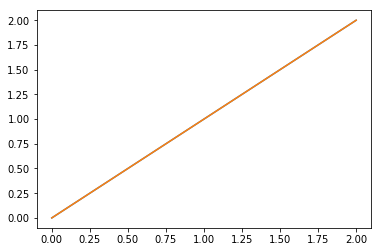

In [23]:
from sklearn import linear_model
import matplotlib.pyplot as plt
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
plt.plot([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

In [20]:
reg.coef_

array([0.5, 0.5])

#### 1.1.2 Ridge Regression. 
This addresses the issue when two or more coefficients are correlated.
You do not run the ridge regression when the parameter is less than 2.

The goal of cross validation is to define a dataset to "test" the model in the training phase

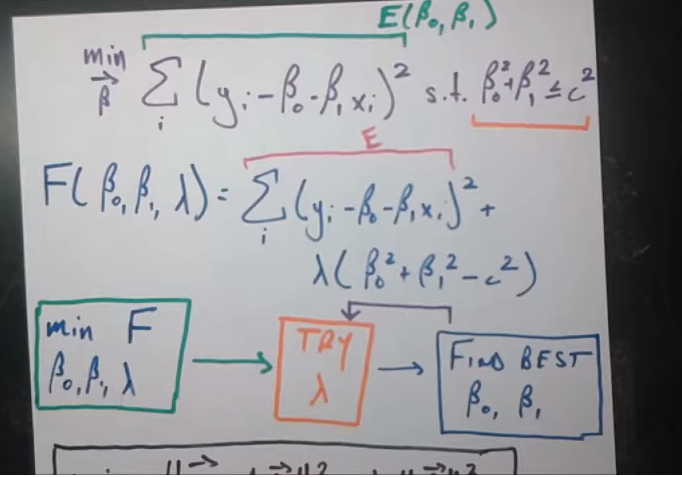

This link explains what the alpha is https://stats.stackexchange.com/questions/166950/alpha-parameter-in-ridge-regression-is-high

In [40]:
reg1 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg1.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg1.coef_


array([0.44186047, 0.44186047])

In [37]:
reg1.intercept_

0.07209302325581218

In [39]:
reg1.alpha_

0.1

#### 1.1.3 Lasso 

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of <font color=blue>Compressed Sensing</font>. Under certain conditions, it can recover the exact set of non-zero weights (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Ridge or lasso are forms of regularized linear regressions. The regularization can also be interpreted as prior in a maximum a posteriori estimation method. Under this interpretation, the ridge and the lasso make different assumptions on the class of linear transformation they infer to relate input and output data. In the ridge, the coefficients of the linear transformation are normal distributed and in the lasso they are Laplace distributed. In the lasso, this makes it easier for the coefficients to be zero and therefore easier to eliminate some of your input variable as not contributing to the output.
https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge
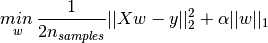

The lasso estimate thus solves the minimization of the least-squares penalty with \alpha ||w||_1 added, where \alpha is a constant and ||w||_1 is the \ell_1-norm of the parameter vector.

As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in L1-based feature selection.



In [44]:
reg2 = linear_model.Lasso(alpha = 0.1)
reg2.fit([[0, 0], [1, 1]], [0, 1])


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
reg2.predict([[1, 1]])


array([0.8])

#### 1.1.4 Multi-Task Lasso

The MultiTaskLasso is a linear model that estimates sparse coefficients for multiple regression problems jointly: y is a 2D array, of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zeros in W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yields scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.